<a href="https://colab.research.google.com/github/MatousE/fashion-clustering/blob/main/autoencoder_fashion_MNIST_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

In [1]:
!pip install pyclesperanto
!pip install umap-learn
import umap

import pyclesperanto as cle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pyclesperanto version: 0.6.5


## Downloading and formatting train and test data

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Defining autoencoder model and training

In [3]:
input_shape = (28, 28, 1)
input_layer = layers.Input(shape=(input_shape))
encoder = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2)(input_layer)
encoder = layers.Conv2D(8, (3,3,), activation='relu', padding='same', strides=2, name='bottleneck_layer')(encoder)

decoder = layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(encoder)
decoder = layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(decoder)
decoder = layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')(decoder)

model_full = Model(input_layer, decoder)
model_full.compile(optimizer='adam', loss='mse')
model_full.build(input_shape)

model_full.fit(x_train, x_train,
               epochs=15,
               shuffle=True,
               validation_data=(x_test, x_test))



Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0136 - val_loss: 0.0059
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

## Defining bottleneck model and obtaining predictions

In [13]:
bottleneck_output = model_full.get_layer('bottleneck_layer').output
model_bottleneck = Model(inputs = model_full.input, outputs = bottleneck_output)

bottleneck_predictions = model_bottleneck.predict(x_test)

313/313 [==============================] - 0s 1ms/step


## UMAP clustering on bottleneck output

In [16]:
predictions_reshaped = np.asarray([x.flatten() for x in bottleneck_predictions])

print(predictions_reshaped.shape)

reducer = umap.UMAP()
embedding = reducer.fit_transform(predictions_reshaped)

print(embedding.shape)

(10000, 392)
(10000, 2)


## Visualise Clusters

9


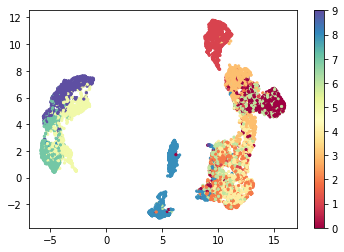

In [23]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test.astype(int), cmap='Spectral', s=5)
plt.colorbar()